# AdventureWorks data analysis: Maximizing profit

Importing necessary libraries for data manipulation and analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

Getting list of selected files which i want to process and analyze

In [2]:
root_folder = r'C:\RetailData\AdventureWorks\csv'
files_sales = [file for file in os.listdir(root_folder) if file.startswith('Sales')]
files_purchase = [file for file in os.listdir(root_folder) if file.startswith('Purchasing')]
files_product = [file for file in os.listdir(root_folder) if file.startswith('Production')]
print(files_sales)
print(files_purchase)
print(files_product)

['Sales_CountryRegionCurrency.csv', 'Sales_CreditCard.csv', 'Sales_Currency.csv', 'Sales_CurrencyRate.csv', 'Sales_Customer.csv', 'Sales_PersonCreditCard.csv', 'Sales_SalesOrderDetail.csv', 'Sales_SalesOrderHeader.csv', 'Sales_SalesOrderHeaderSalesReason.csv', 'Sales_SalesPerson.csv', 'Sales_SalesPersonQuotaHistory.csv', 'Sales_SalesReason.csv', 'Sales_SalesTaxRate.csv', 'Sales_SalesTerritory.csv', 'Sales_SalesTerritoryHistory.csv', 'Sales_ShoppingCartItem.csv', 'Sales_SpecialOffer.csv', 'Sales_SpecialOfferProduct.csv', 'Sales_Store.csv']
['Purchasing_ProductVendor.csv', 'Purchasing_PurchaseOrderDetail.csv', 'Purchasing_PurchaseOrderHeader.csv', 'Purchasing_ShipMethod.csv', 'Purchasing_Vendor.csv']
['Production_BillOfMaterials.csv', 'Production_Culture.csv', 'Production_Document.csv', 'Production_Illustration.csv', 'Production_Location.csv', 'Production_Product.csv', 'Production_ProductCategory.csv', 'Production_ProductCostHistory.csv', 'Production_ProductDescription.csv', 'Production_

Reading selected files into a pandas dataframe

In [3]:
df_sales = {}
df_purchases = {}
df_products = {}

for file in files_sales:
    name=file.split('.')[0]
    df_sales[name] = pd.read_csv(os.path.join(root_folder, file), sep=';')

for file in files_purchase:
    name=file.split('.')[0]
    df_purchases[name] = pd.read_csv(os.path.join(root_folder, file), sep=';')

for file in files_product:
    name=file.split('.')[0]
    df_products[name] = pd.read_csv(os.path.join(root_folder, file), sep=';')


print(list(df_sales.keys()))
print(list(df_purchases.keys()))
print(list(df_products.keys()))


['Sales_CountryRegionCurrency', 'Sales_CreditCard', 'Sales_Currency', 'Sales_CurrencyRate', 'Sales_Customer', 'Sales_PersonCreditCard', 'Sales_SalesOrderDetail', 'Sales_SalesOrderHeader', 'Sales_SalesOrderHeaderSalesReason', 'Sales_SalesPerson', 'Sales_SalesPersonQuotaHistory', 'Sales_SalesReason', 'Sales_SalesTaxRate', 'Sales_SalesTerritory', 'Sales_SalesTerritoryHistory', 'Sales_ShoppingCartItem', 'Sales_SpecialOffer', 'Sales_SpecialOfferProduct', 'Sales_Store']
['Purchasing_ProductVendor', 'Purchasing_PurchaseOrderDetail', 'Purchasing_PurchaseOrderHeader', 'Purchasing_ShipMethod', 'Purchasing_Vendor']
['Production_BillOfMaterials', 'Production_Culture', 'Production_Document', 'Production_Illustration', 'Production_Location', 'Production_Product', 'Production_ProductCategory', 'Production_ProductCostHistory', 'Production_ProductDescription', 'Production_ProductDocument', 'Production_ProductInventory', 'Production_ProductListPriceHistory', 'Production_ProductModel', 'Production_Produc

Since sale detail information is my main file here in the next two cells I am checking any missing value and duplicates

In [4]:
df_saleDetail = df_sales.get('Sales_SalesOrderDetail')
df_saleDetail.isna().sum()

SalesOrderID                 0
SalesOrderDetailID           0
CarrierTrackingNumber    60398
OrderQty                     0
ProductID                    0
SpecialOfferID               0
UnitPrice                    0
UnitPriceDiscount            0
LineTotal                    0
rowguid                      0
ModifiedDate                 0
dtype: int64

In [5]:
df_saleDetail.drop('CarrierTrackingNumber', axis=1, inplace=True)

In [6]:
total_duplicates = df_saleDetail.duplicated().sum()
total_duplicates

0

Getting the description of sales detail dataframe

In [7]:
df_saleDetail.describe()

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal
count,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000
mean,57827.363782,60659.000000,2.266080,841.680836,1.162541,465.093496,0.002826,905.449207
std,9009.147902,35021.345641,2.491323,86.452124,1.218604,751.885081,0.024811,1693.417389
min,43659.000000,1.000000,1.000000,707.000000,1.000000,1.328200,0.000000,1.374000
25%,49884.000000,30330.000000,1.000000,768.000000,1.000000,21.490000,0.000000,24.990000
50%,57029.000000,60659.000000,1.000000,863.000000,1.000000,49.990000,0.000000,134.982000
75%,65490.000000,90988.000000,3.000000,921.000000,1.000000,602.346000,0.000000,1120.490000
max,75123.000000,121317.000000,44.000000,999.000000,16.000000,3578.270000,0.400000,27893.619000


There are extreame values which are much higher than 3rd quartile and lower than 1st quartile. For exmaple maximum order quantiry is 44 and 75 percentile order quantiry is only 3 and the order quantity distribution is shown on the box plot below.
Assuming all the data are correct I am not fixing outliers.

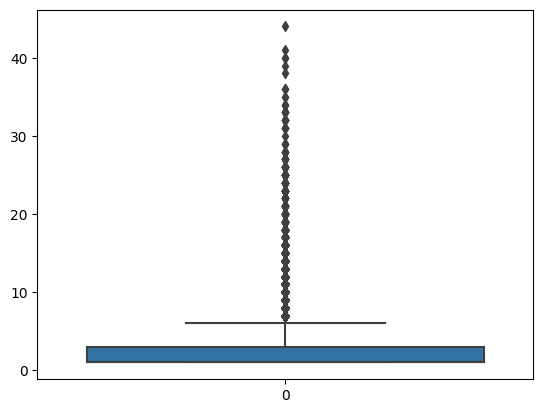

In [8]:
sns.boxplot(data=df_saleDetail['OrderQty']) 
plt.show()

Readding csv files which I want to use for my analysis in addition to sales detail file.

In [9]:
df_saleHeader = df_sales.get('Sales_SalesOrderHeader')
df_saleTerritory = df_sales.get('Sales_SalesTerritory')
df_product = df_products.get('Production_Product')
df_prodSubCategory = df_products.get('Production_ProductSubcategory')
df_prodCategory = df_products.get('Production_ProductCategory')
df_purchaseDetails = df_purchases.get('Purchasing_PurchaseOrderDetail')
df_purchaseVendor = df_purchases.get('Purchasing_ProductVendor')

Merge sale detail and sale header files based on sale order ID to get more information about the sale.

In [10]:
df_salesOrder_OrderHeader = pd.merge(df_saleDetail, df_saleHeader, on='SalesOrderID', how='left', suffixes=('_saleDetail', '_saleHeader'))
df_salesOrder_OrderHeader.columns

Index(['SalesOrderID', 'SalesOrderDetailID', 'OrderQty', 'ProductID',
       'SpecialOfferID', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal',
       'rowguid_saleDetail', 'ModifiedDate_saleDetail', 'RevisionNumber',
       'OrderDate', 'DueDate', 'ShipDate', 'Status', 'OnlineOrderFlag',
       'SalesOrderNumber', 'PurchaseOrderNumber', 'AccountNumber',
       'CustomerID', 'SalesPersonID', 'TerritoryID', 'BillToAddressID',
       'ShipToAddressID', 'ShipMethodID', 'CreditCardID',
       'CreditCardApprovalCode', 'CurrencyRateID', 'SubTotal', 'TaxAmt',
       'Freight', 'TotalDue', 'Comment', 'rowguid_saleHeader',
       'ModifiedDate_saleHeader'],
      dtype='object')

Converting data time information in to day, month and year

In [11]:
df_salesOrder_OrderHeader["OrderDate"]= pd.to_datetime(df_salesOrder_OrderHeader["OrderDate"])
df_salesOrder_OrderHeader['month_order'] = df_salesOrder_OrderHeader['OrderDate'].dt.month_name()
df_salesOrder_OrderHeader['day_order'] = df_salesOrder_OrderHeader['OrderDate'].dt.day
df_salesOrder_OrderHeader['year_order'] = df_salesOrder_OrderHeader['OrderDate'].dt.year

Again merging data frames to get more information.

In [12]:
df_salesOrder_Header_teritory = pd.merge(df_salesOrder_OrderHeader, df_saleTerritory, on='TerritoryID', how='left', suffixes=('_saleInfo', '_teritoryInfo'))

In [13]:
prod_cat_merged = pd.merge(df_prodCategory, df_prodSubCategory, on='ProductCategoryID') 

In [14]:
df_prodInfo = pd.merge(df_product, prod_cat_merged, on='ProductSubcategoryID', suffixes=('_prod', '_prodCat')) 

In [15]:
df_salesOrderHeaderTeritory_ProdInfo = pd.merge(df_salesOrder_Header_teritory, df_prodInfo, on='ProductID', how='left', suffixes=('_salesInfo', '_ProdInfo')) 

In [16]:
 df_purchaseInfo = pd.merge(df_purchaseDetails, df_purchaseVendor, on='ProductID', how='left', suffixes=('_purchInfo', '_purchvendor')) 

In [17]:
df_salesOrderHeaderTeritory_ProdInfo.columns

Index(['SalesOrderID', 'SalesOrderDetailID', 'OrderQty', 'ProductID',
       'SpecialOfferID', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal',
       'rowguid_saleDetail', 'ModifiedDate_saleDetail', 'RevisionNumber',
       'OrderDate', 'DueDate', 'ShipDate', 'Status', 'OnlineOrderFlag',
       'SalesOrderNumber', 'PurchaseOrderNumber', 'AccountNumber',
       'CustomerID', 'SalesPersonID', 'TerritoryID', 'BillToAddressID',
       'ShipToAddressID', 'ShipMethodID', 'CreditCardID',
       'CreditCardApprovalCode', 'CurrencyRateID', 'SubTotal', 'TaxAmt',
       'Freight', 'TotalDue', 'Comment', 'rowguid_saleHeader',
       'ModifiedDate_saleHeader', 'month_order', 'day_order', 'year_order',
       'Name_salesInfo', 'CountryRegionCode', 'Group', 'SalesYTD',
       'SalesLastYear', 'CostYTD', 'CostLastYear', 'rowguid_salesInfo',
       'ModifiedDate_salesInfo', 'Name_ProdInfo', 'ProductNumber', 'MakeFlag',
       'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint',
       'Stan

In [20]:
df_salesOrderHeaderTeritory_ProdInfo['cost_totalorder'] = df_salesOrderHeaderTeritory_ProdInfo['StandardCost'] * df_salesOrderHeaderTeritory_ProdInfo['OrderQty']


df_salesOrderHeaderTeritory_ProdInfo['Profit'] = df_salesOrderHeaderTeritory_ProdInfo['LineTotal'] - df_salesOrderHeaderTeritory_ProdInfo['cost_totalorder']

Analysing data: Relation ship between unit price and order quantity on each product category. The lower the price the higher the number of orders.

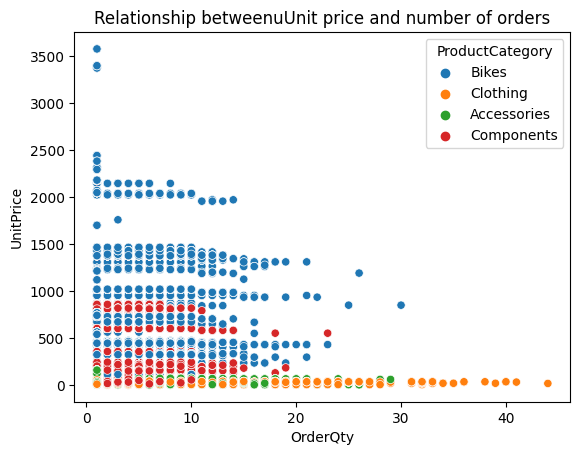

In [21]:
sns.scatterplot(data=df_salesOrderHeaderTeritory_ProdInfo, x="OrderQty", y="UnitPrice", hue = "Name_x")
plt.title("Relationship betweenuUnit price and number of orders")
plt.legend(title='ProductCategory', loc='upper right')

Relationships between discount and number of orders.

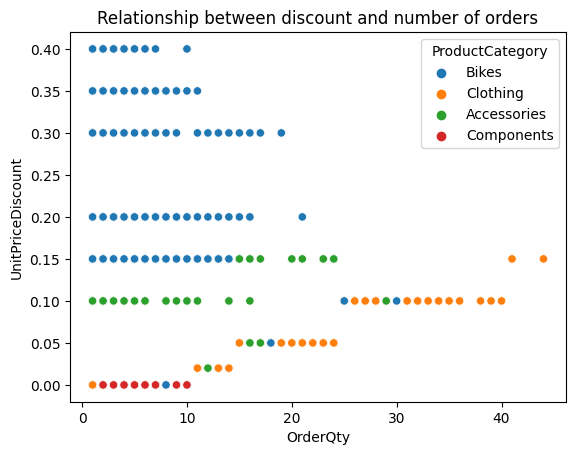

In [22]:
sns.scatterplot(data=df_salesOrderHeaderTeritory_ProdInfo, x="OrderQty", y="UnitPriceDiscount", hue = "Name_x")
plt.title("Relationship between discount and number of orders")
plt.legend(title='ProductCategory', loc='upper right')

comparing order quantity for each sub categories of products

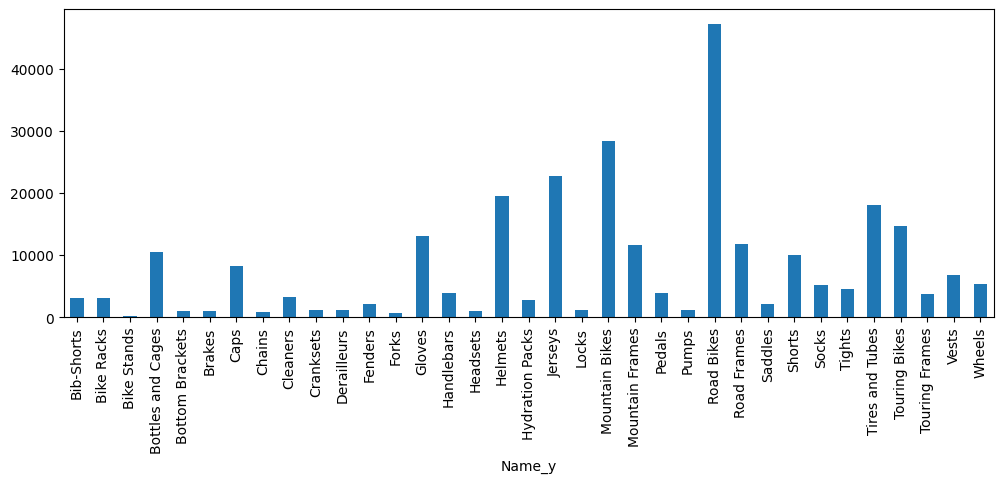

In [23]:
fig = plt.figure(figsize=(12, 4))
sales_by_ProdSubCategory = df_salesOrderHeaderTeritory_ProdInfo['OrderQty'].groupby(df_salesOrderHeaderTeritory_ProdInfo['Name_y']).sum()
sales_by_ProdSubCategory.plot(kind='bar')

plt.show()

Checking sale seasonality

[2011, 2012, 2013, 2014]


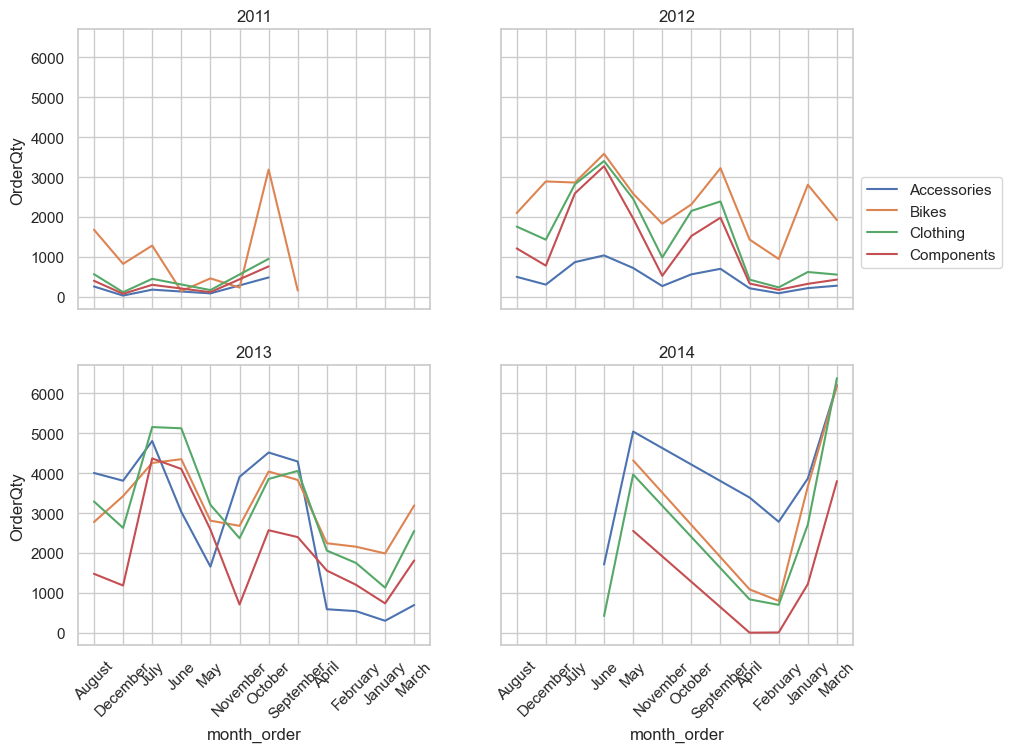

In [162]:
groupby_year = df_salesOrderHeaderTeritory_ProdInfo.groupby("year_order")
titles = list(groupby_year.groups)
print(titles)
fig, axes = plt.subplots(2,2,figsize=(10,8), sharex=True, sharey=True)
i=0
j=0
c=0
is_legend=False

for grp_name, group_df in groupby_year:
    if i==0 and j==1:
        is_legend=True
    else:
        is_legend=False
    p = sns.lineplot(data=group_df.groupby(['month_order', 'Name_x'], as_index=False)['OrderQty'].sum(),
           x='month_order', y='OrderQty', hue='Name_x',  legend = is_legend, ax=axes[i][j]).set(title=titles[c])

    handles, labels = axes[i][j].get_legend_handles_labels()
   
  
    if j==1:
        i+=1
        j=0
    else:
        j+=1
    c+=1
  

axes[1, 0].tick_params('x', labelrotation=45)
axes[1, 1].tick_params('x', labelrotation=45)

axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))

plt.show()
plt.show()

Calculating and getting information which product has more profit

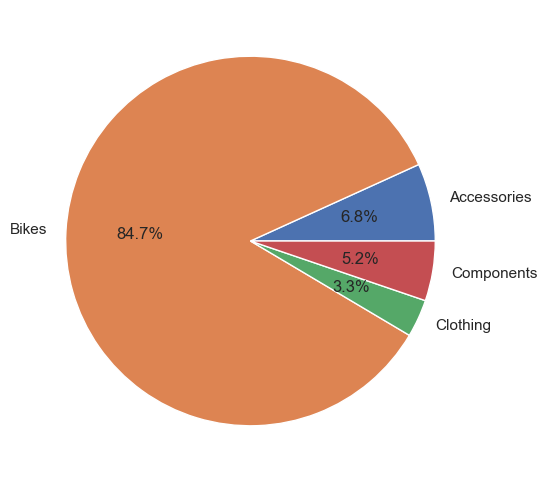

In [132]:
profit_by_category = df_salesOrderHeaderTeritory_ProdInfo.groupby('Name_x')['Profit'].sum()
pie_df = pd.DataFrame({'Name_x': profit_by_category.index, 'Profit': profit_by_category.values})

plt.figure(figsize=(6, 6))
plt.pie(pie_df['Profit'], labels=pie_df['Name_x'], autopct='%1.1f%%')
# plt.title("Profit from Sale of different categories")
plt.show()

Total order quantity by year of sale

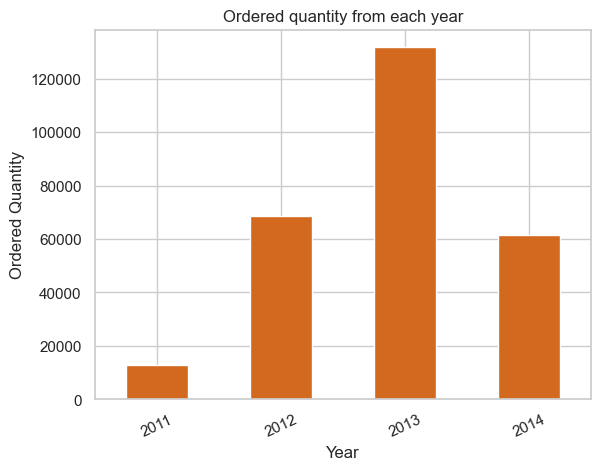

In [140]:
profit_by_year = df_salesOrderHeaderTeritory_ProdInfo['OrderQty'].groupby(df_salesOrder_OrderHeader['year_order']).sum()
profit_by_year.plot(kind='bar', color='chocolate')
plt.xticks(rotation = 25)
plt.xlabel('Year')
plt.ylabel('Ordered Quantity')
plt.title("Ordered quantity from each year")
plt.show()

Percentage of total profit by year

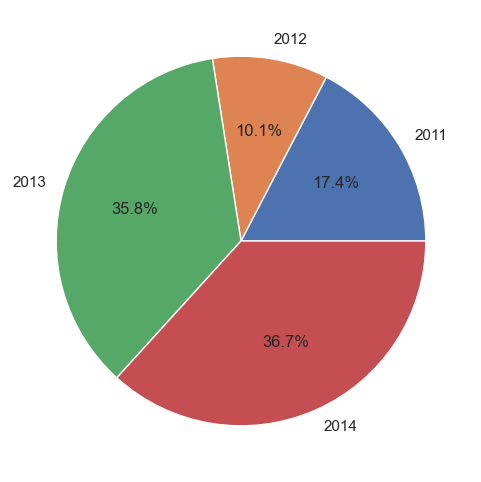

In [133]:
profit_by_year = df_salesOrderHeaderTeritory_ProdInfo.groupby('year_order')['Profit'].sum()
pie_df = pd.DataFrame({'year_order': profit_by_year.index, 'Profit': profit_by_year.values})

plt.figure(figsize=(6, 6))
plt.pie(pie_df['Profit'], labels=pie_df['year_order'], autopct='%1.1f%%')
# plt.title("Profit from Sale of different categories")
plt.show()

Order quantity for each year in different regions for sale of bike

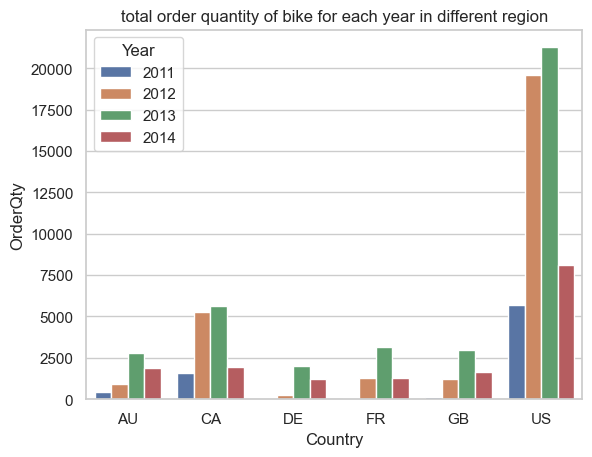

In [163]:
sale_groupedBcategory = df_salesOrderHeaderTeritory_ProdInfo.groupby('Name_x')
sale_bike = sale_groupedBcategory.get_group('Bikes')

sns.barplot(data=sale_bike.groupby(['CountryRegionCode', 'year_order'], as_index=False)['OrderQty'].sum(),
            x='CountryRegionCode', y='OrderQty', hue='year_order')
plt.xlabel('Country')
plt.title('total order quantity of bike for each year in different region')
plt.legend(title='Year', loc='upper left')



Profit by country and by product category

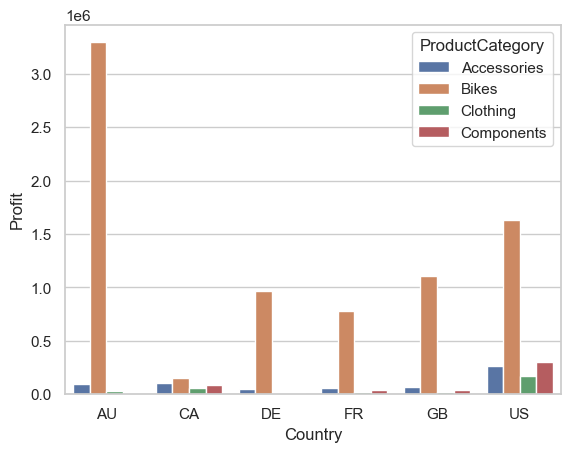

In [148]:
sns.barplot(data=df_salesOrderHeaderTeritory_ProdInfo.groupby(['CountryRegionCode', 'Name_x'], as_index=False)['Profit'].sum(),
            x='CountryRegionCode', y='Profit', hue='Name_x')
plt.xlabel('Country')
plt.legend(title='ProductCategory', loc='upper right')

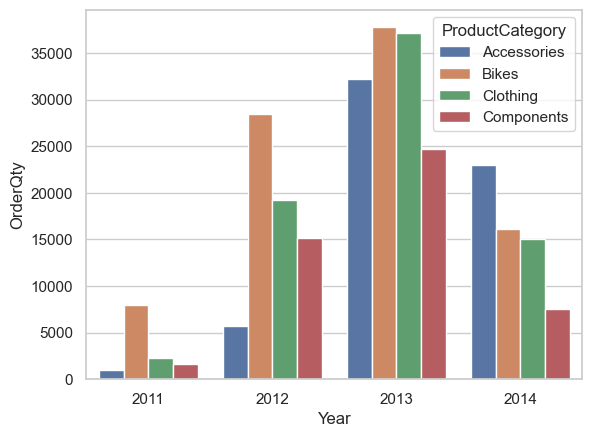

In [141]:
sns.barplot(data=df_salesOrderHeaderTeritory_ProdInfo.groupby(['year_order', 'Name_x'], as_index=False)['OrderQty'].sum(),
            x='year_order', y='OrderQty', hue='Name_x')
plt.xlabel('Year')
plt.legend(title='ProductCategory', loc='upper right')

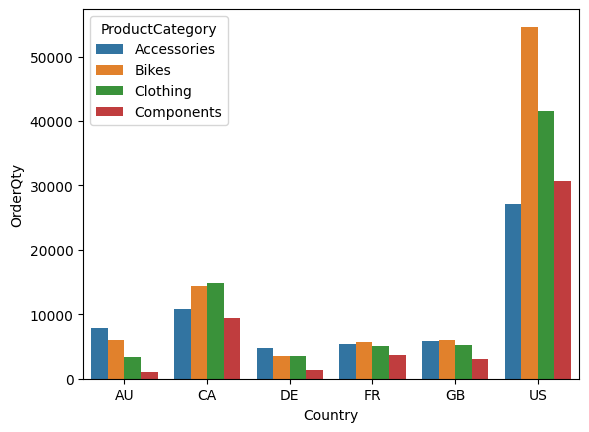

In [127]:
sns.barplot(data=df_salesOrderHeaderTeritory_ProdInfo.groupby(['CountryRegionCode', 'Name_x'], as_index=False)['OrderQty'].sum(),
            x='CountryRegionCode', y='OrderQty', hue='Name_x')

plt.xlabel('Country')
plt.legend(title='ProductCategory', loc='upper left')

In [131]:
#only 4 products have riview ratings so not important to include in prediction
df_prodReview = df_product.get('Production_ProductReview')
df_prodReview.head(5)

,ProductReviewID,ProductID,ReviewerName,ReviewDate,EmailAddress,Rating,Comments,ModifiedDate
0,1,709,John Smith,2013-09-18,john@fourthcoffee.com,5,I can't believe I'm singing the praises of a p...,2013-09-18
1,2,937,David,2013-11-13,david@graphicdesigninstitute.com,4,"A little on the heavy side, but overall the en...",2013-11-13
2,3,937,Jill,2013-11-15,jill@margiestravel.com,2,Maybe it's just because I'm new to mountain bi...,2013-11-15
3,4,798,Laura Norman,2013-11-15,laura@treyresearch.net,5,The Road-550-W from Adventure Works Cycles is ...,2013-11-15


In [61]:
selected_cols = ['OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal',
       'OrderDate', 'CustomerID', 'SalesPersonID', 'TerritoryID', 'TaxAmt',
       'month_order', 'year_order', 'CountryRegionCode', 'Group', 
       'SalesYTD','SalesLastYear', 'CostYTD', 'CostLastYear', 'Name_ProdInfo', 
       'ProductNumber', 'Color', 'SafetyStockLevel', 'StandardCost', 'ListPrice', 
       'Size', 'Weight', 'ProductLine', 'Class', 'Style',
       'ProductModelID', 'SellEndDate', 'DiscontinuedDate',
        'Name_x',  'Name_y', 'Profit']



In [62]:
df_selected = df_salesOrderHeaderTeritory_ProdInfo[selected_cols].copy()
df_selected.rename(columns={'Name_x': 'ProductCategory', 'Name_y': 'ProductSubCategory','Name_ProdInfo': 'ProductName'}, inplace=True)

In [50]:
(df_selected.isna().sum())*(100/df_selected.shape[0])

OrderQty                0.000000
UnitPrice               0.000000
UnitPriceDiscount       0.000000
LineTotal               0.000000
OrderDate               0.000000
CustomerID              0.000000
SalesPersonID          49.785273
TerritoryID             0.000000
TaxAmt                  0.000000
month_order             0.000000
year_order              0.000000
CountryRegionCode       0.000000
Group                   0.000000
SalesYTD                0.000000
SalesLastYear           0.000000
CostYTD                 0.000000
CostLastYear            0.000000
ProductName             0.000000
ProductNumber           0.000000
Color                  28.145272
SafetyStockLevel        0.000000
StandardCost            0.000000
ListPrice               0.000000
Size                   42.518361
Weight                 55.117585
ProductLine             1.885968
Class                  47.349506
Style                  40.615907
ProductModelID          0.000000
SellEndDate            81.990982
Discontinu

In [33]:
df_selected['ProductLine'].unique()

array(['M ', 'S ', 'R ', nan, 'T '], dtype=object)

Handling missing values
1. Delete all columns with nan values equal or greater than 50%, the rest handled based on data type
2. Imputing categorical values with mode
3. Imputing numeric values with mean value

In [63]:
df_selected.drop(['SalesPersonID', 'Weight','SellEndDate', 'DiscontinuedDate'], axis=1, inplace=True)

In [64]:
#categorical data most frequent values
mode_color = df_selected['Color'].mode()[0]
mode_size = df_selected['Size'].mode()[0] 
mode_class = df_selected['Class'].mode()[0]
mode_style = df_selected['Style'].mode()[0] 
mode_prodLine = df_selected['ProductLine'].mode()[0] 
df_selected.fillna({'ProductLine':mode_prodLine, 'Color':mode_color, 'Size': mode_size, 'Class':mode_class, 'Style': mode_style},inplace=True)

Correlation of features: checking how columns are related

In [37]:
cols_num = ['OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal',  'SafetyStockLevel',
       'CustomerID', 'TerritoryID', 'TaxAmt', 'year_order', 'ListPrice',
        'SalesYTD', 'SalesLastYear','StandardCost', 'Profit']

corr = df_selected[cols_num].corr(method='spearman')

In [38]:
import numpy as np

Text(0.5, 1.0, 'Correlation between fields')

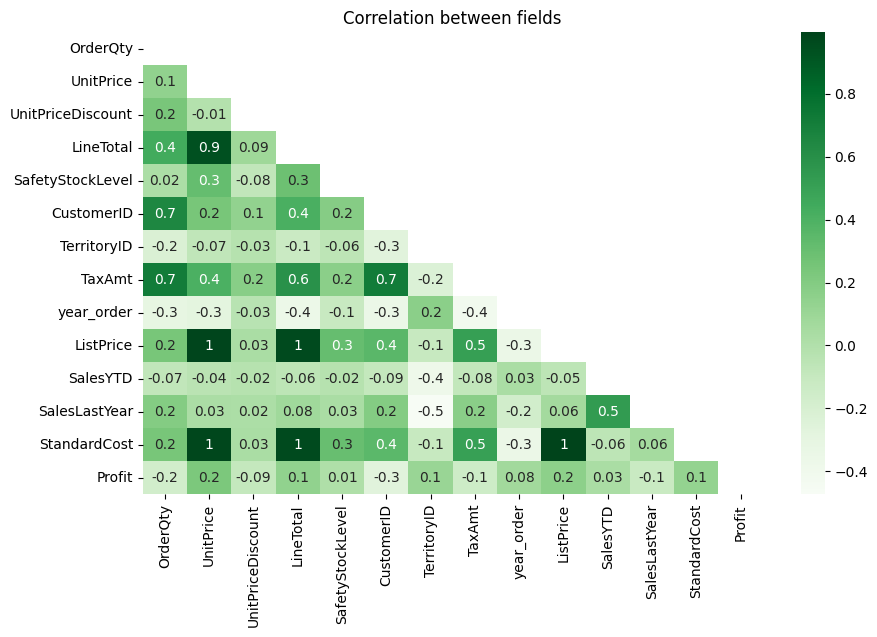

In [39]:
fig = plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap="Greens", fmt='.1g')
plt.title("Correlation between fields")

There are columns that are highly correlated so I will remover common correlated value.
UnitPrice and StandardCost, ListPrice and StandardCost, ListPrice and UnitPrice, ListPrice and LineTotal => I will remove ListPrice and StandardCost.

In [65]:
df_selected.drop(['StandardCost', 'ListPrice'], axis=1, inplace=True)

In [66]:
print(len(df_selected['CustomerID'].unique()))
print(len(df_selected['TerritoryID'].unique()))
print(len(df_selected['Size'].unique()))
print(len(df_selected['Style'].unique()))
print(len(df_selected['ProductCategory'].unique()))
print(len(df_selected['ProductSubCategory'].unique()))
print(len(df_selected['CountryRegionCode'].unique()))
print(len(df_selected['Group'].unique()))
print(len(df_selected['ProductName'].unique()))
print(len(df_selected['Color'].unique()))
print(len(df_selected['Class'].unique()))

19119
10
18
3
4
35
6
3
266
8
3


Encoding categorical values
1. Encode large categorical columns with frequecy encoder
2. columns with small number of category will be encoded with one hot encoder

In [42]:
from category_encoders import CountEncoder

In [67]:
freq_encoder = CountEncoder()

# encode the categorical column
df_selected['ProductName_freq'] = freq_encoder.fit_transform(df_selected['ProductName'])
df_selected['CustomerID_freq'] = freq_encoder.fit_transform(df_selected['CustomerID'])

df_selected.drop(['CustomerID', 'ProductName'], axis=1, inplace=True)


In [102]:
df_selected.columns

Index(['OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'LineTotal', 'OrderDate',
       'TerritoryID', 'TaxAmt', 'month_order', 'year_order',
       'CountryRegionCode', 'Group', 'SalesYTD', 'SalesLastYear', 'CostYTD',
       'CostLastYear', 'ProductNumber', 'Color', 'SafetyStockLevel', 'Size',
       'ProductLine', 'Class', 'Style', 'ProductModelID', 'ProductCategory',
       'ProductSubCategory', 'Profit', 'ProductName_freq', 'CustomerID_freq'],
      dtype='object')

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [117]:
df_temp = df_selected.drop(['OrderDate', 'ProductNumber', 'ProductLine'], axis=1)


In [116]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OrderQty            121317 non-null  int64  
 1   UnitPrice           121317 non-null  float64
 2   UnitPriceDiscount   121317 non-null  float64
 3   LineTotal           121317 non-null  float64
 4   TerritoryID         121317 non-null  int64  
 5   TaxAmt              121317 non-null  float64
 6   month_order         121317 non-null  object 
 7   year_order          121317 non-null  int32  
 8   CountryRegionCode   121317 non-null  object 
 9   Group               121317 non-null  object 
 10  SalesYTD            121317 non-null  float64
 11  SalesLastYear       121317 non-null  float64
 12  CostYTD             121317 non-null  float64
 13  CostLastYear        121317 non-null  float64
 14  Color               121317 non-null  object 
 15  SafetyStockLevel    121317 non-nul

In [118]:
cols_onehotenc = ['month_order', 'year_order', 'TerritoryID','Size', 'Style','ProductCategory','ProductSubCategory','CountryRegionCode','Group','Color','Class']


ohe = OneHotEncoder()
ohe.fit_transform(df_temp[cols_onehotenc])

df_encoded_cols = pd.DataFrame(ohe.transform(df_temp[cols_2bencoded]).toarray(), columns=ohe.get_feature_names_out(cols_onehotenc))
df_remaining_cols = df_temp.drop(columns=cols_onehotenc)
df_fina_encoded = pd.concat([df_remaining_cols, df_encoded_cols], axis=1)


Machine learing model: predicting profit. For prediction I am using random forest regressor.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as mt

creating dependent(target) and indelpendet variables: I want to predict the profit from the sale and product information.

In [119]:
Y=df_fina_encoded['Profit']
X=df_fina_encoded.drop(['Profit'], axis=1)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [121]:
rforest_regr = RandomForestRegressor(n_estimators=28,random_state=0)
rforest_regr.fit(x_train,y_train)
rforest_y_predicted = rforest_regr.predict(x_test)
print(mt.r2_score(y_test, rforest_y_predicted))

0.9920398769072428


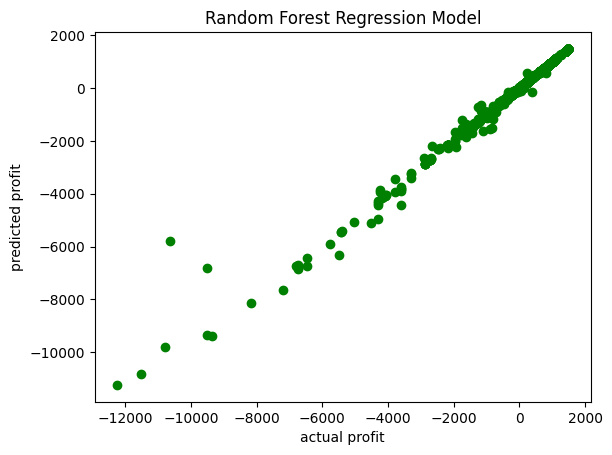

In [123]:
plt.scatter(y_test, rforest_y_predicted,  color = 'green') 
plt.title('Random Forest Regression Model')
plt.xlabel('actual profit')
plt.ylabel('predicted profit')
plt.show()

To be continued ...

Feature importance ---

